# Preparación ambiente

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Importación dataset

In [2]:
old_data=pd.read_csv("patient.csv")

#reemplazo death_date por 0 y 1 como vivo/muerto
#old_data["death_date"]=old_data["death_date"].replace({"9999-99-99": 1})
#old_data.loc[old_data['death_date'] != 1, 'death_date'] = 0

In [3]:
old_data.outcome.value_counts()

2    59704
1    23471
3    12664
Name: outcome, dtype: int64

In [4]:
old_data.shape

(95839, 20)

In [5]:
old_data['outcome']=old_data['outcome'].astype(int)

In [6]:
old_data = old_data[old_data.outcome != 3]

In [7]:
old_data["outcome"]=old_data["outcome"].replace({2: 0})

In [8]:
print(old_data.nunique())
print(old_data.shape)

sex                         2
patient_type                2
intubated                   4
pneumonia                   3
age                       104
pregnant                    4
diabetes                    3
copd                        3
asthma                      3
immunosuppression           3
hypertension                3
other_diseases              3
cardiovascular              3
obesity                     3
chronic_kidney_failure      3
smoker                      3
another_case                3
outcome                     2
icu                         4
death_date                 55
dtype: int64
(83175, 20)


In [9]:
#old_data['death_date']=old_data['death_date'].astype(object).astype(int)

In [10]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83175 entries, 0 to 95802
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   sex                     83175 non-null  int64 
 1   patient_type            83175 non-null  int64 
 2   intubated               83175 non-null  int64 
 3   pneumonia               83175 non-null  int64 
 4   age                     83175 non-null  int64 
 5   pregnant                83175 non-null  int64 
 6   diabetes                83175 non-null  int64 
 7   copd                    83175 non-null  int64 
 8   asthma                  83175 non-null  int64 
 9   immunosuppression       83175 non-null  int64 
 10  hypertension            83175 non-null  int64 
 11  other_diseases          83175 non-null  int64 
 12  cardiovascular          83175 non-null  int64 
 13  obesity                 83175 non-null  int64 
 14  chronic_kidney_failure  83175 non-null  int64 
 15  sm

In [11]:
old_data.head()

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,9999-99-99
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,9999-99-99
2,2,2,2,2,51,97,1,2,2,2,1,2,2,1,2,2,99,1,2,9999-99-99
3,2,2,2,2,57,97,1,2,2,2,2,2,2,2,2,2,99,1,2,2020-04-01
4,1,2,2,2,44,2,1,2,2,2,2,2,2,2,2,2,2,0,2,9999-99-99


# Dataset casi completo

## Correlación entre variables

In [12]:
old_data.corr().abs()

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu
sex,1.000000,0.099855,0.099937,0.037784,0.034178,0.994610,0.013262,0.016414,0.016135,0.013218,0.015355,0.018750,0.014163,0.015852,0.014273,0.009945,0.020295,0.098489,0.099983
patient_type,0.099855,1.000000,0.999405,0.245798,0.264302,0.099376,0.007417,0.015491,0.022413,0.019397,0.004829,0.029860,0.020061,0.012677,0.016838,0.021103,0.173116,0.196971,0.999371
intubated,0.099937,0.999405,1.000000,0.246076,0.264637,0.099463,0.007543,0.015612,0.022541,0.019514,0.004948,0.029994,0.020186,0.012797,0.016967,0.021234,0.173110,0.197248,0.999961
pneumonia,0.037784,0.245798,0.246076,1.000000,0.094538,0.037710,0.001322,0.004253,0.006487,0.006846,0.001048,0.011564,0.006780,0.002718,0.004569,0.006189,0.029940,0.074729,0.246025
age,0.034178,0.264302,0.264637,0.094538,1.000000,0.033551,0.006638,0.019474,0.024932,0.023058,0.002857,0.024516,0.020984,0.016622,0.024191,0.022039,0.035751,0.174795,0.264656
pregnant,0.994610,0.099376,0.099463,0.037710,0.033551,1.000000,0.026736,0.030776,0.030445,0.027308,0.029456,0.030866,0.027994,0.030180,0.028275,0.023660,0.019156,0.100146,0.099509
diabetes,0.013262,0.007417,0.007543,0.001322,0.006638,0.026736,1.000000,0.877543,0.890649,0.869957,0.893950,0.768549,0.876150,0.851039,0.870222,0.850169,0.032804,0.050455,0.007529
copd,0.016414,0.015491,0.015612,0.004253,0.019474,0.030776,0.877543,1.000000,0.919712,0.912749,0.901654,0.799077,0.904822,0.874369,0.902171,0.882049,0.038175,0.058184,0.015599
asthma,0.016135,0.022413,0.022541,0.006487,0.024932,0.030445,0.890649,0.919712,1.000000,0.922733,0.903192,0.805754,0.912124,0.879482,0.918336,0.892673,0.040468,0.062070,0.022545
immunosuppression,0.013218,0.019397,0.019514,0.006846,0.023058,0.027308,0.869957,0.912749,0.922733,1.000000,0.896360,0.806913,0.905129,0.876246,0.905719,0.885935,0.039144,0.057792,0.019094


In [13]:
old_data.shape

(83175, 20)

<AxesSubplot:>

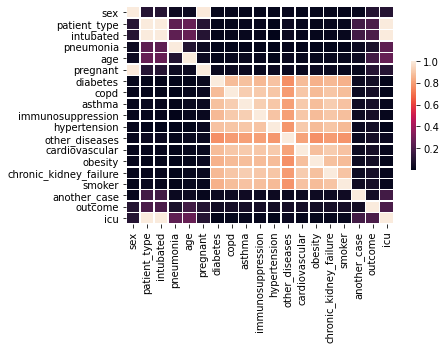

In [14]:
sns.heatmap(old_data.corr().abs(),annot=False,linewidths=.5, cbar_kws={"shrink": .5})

## Creación variables X e Y

Eliminamos las columnas death_date, icu (por su correlación lineal con intubated)

In [15]:
#sns.heatmap(data.corr().abs(),annot=True)
x=old_data.drop(["outcome", "death_date", "icu"],axis=1)
y=old_data["outcome"]
y=pd.DataFrame(y)
y

,outcome
0,1
1,1
2,1
3,1
4,0
...,...
95779,1
95797,0
95798,0
95800,0


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print ("X_train:" , x_train.shape[0])
print ("y_train:" , y_train.shape[0])
print ("X_test:" , x_test.shape[0])
print ("y_test:" , y_test.shape[0])

X_train: 66540
y_train: 66540
X_test: 16635
y_test: 16635


In [17]:
y_train=pd.DataFrame(y_train)
y_train

,outcome
13703,1
18856,0
58296,0
50713,0
57694,0
...,...
21510,0
77179,0
50953,1
5193,0


In [18]:
y_train=y_train.astype('float')
y_test=y_test.astype('float')

## Machine Learning Algorithms

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [20]:
#Navie Bayes
nb=GaussianNB()
nb.fit(x_train, y_train)
score_nb=nb.score(x_test,y_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
score_knn=knn.score(x_test,y_test)

#Logistic regression
scaler = StandardScaler()
x_trainstd = scaler.fit_transform(x_train)
x_teststd = scaler.transform(x_test)
lr = LogisticRegression()
lr.fit(x_trainstd, y_train)
score_lr= lr.score(x_teststd, y_test)

#Score
print ("Navie Bayes Acc Score:",score_nb)
print ("KNN Acc Score:",score_knn)
print("Logistic Regression Score:", score_lr)

Navie Bayes Acc Score: 0.7181244364292155
KNN Acc Score: 0.6831379621280432
Logistic Regression Score: 0.7194469492034866


In [21]:
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_lr = lr.predict(x_test)

## Confusion_matrix

In [22]:
print("CM NB:\n", confusion_matrix(y_test, y_pred_nb))
print("CM KNN:\n", confusion_matrix(y_test, y_pred_knn))
print("CM LR:\n", confusion_matrix(y_test, y_pred_lr))

CM NB:
 [[11883    56]
 [ 4633    63]]
CM KNN:
 [[9775 2164]
 [3107 1589]]
CM LR:
 [[8596 3343]
 [2419 2277]]


## Recall,Precision and F-1 Score


* Recall    =  TP / (TP + FN)
* Precision = TP / (TP + FP) 
* F-Measure = (2 * Precision * Recall) / (Precision + Recall)

In [23]:
print("NB:\n", classification_report(y_test,y_pred_nb))
print("KNN:\n", classification_report(y_test,y_pred_knn))
print("LR:\n", classification_report(y_test,y_pred_lr))

NB:
               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84     11939
         1.0       0.53      0.01      0.03      4696

    accuracy                           0.72     16635
   macro avg       0.62      0.50      0.43     16635
weighted avg       0.67      0.72      0.61     16635

KNN:
               precision    recall  f1-score   support

         0.0       0.76      0.82      0.79     11939
         1.0       0.42      0.34      0.38      4696

    accuracy                           0.68     16635
   macro avg       0.59      0.58      0.58     16635
weighted avg       0.66      0.68      0.67     16635

LR:
               precision    recall  f1-score   support

         0.0       0.78      0.72      0.75     11939
         1.0       0.41      0.48      0.44      4696

    accuracy                           0.65     16635
   macro avg       0.59      0.60      0.60     16635
weighted avg       0.67      0.65      0.66     16635



In [24]:
print ("F1 Score NB:", f1_score(y_test,y_pred_nb))
print ("F1 Score KNN:", f1_score(y_test,y_pred_knn))
print ("F1 Score LR:", f1_score(y_test,y_pred_lr))

F1 Score NB: 0.026168224299065422
F1 Score KNN: 0.37613918806959407
F1 Score LR: 0.441450174486235


## roc & auc

In [25]:
#NB
probs_nb=nb.predict_proba(x_test)
preds_nb=probs_nb[:,1]
fpr_nb,tpr_nb, threshold_nb =metrics.roc_curve(y_test, y_pred_nb)
roc_auc_nb=metrics.auc(fpr_nb,tpr_nb)

#KNN
probs_knn=knn.predict_proba(x_test)
preds_knn=probs_knn[:,1]
fpr_knn,tpr_knn, threshold_knn =metrics.roc_curve(y_test, y_pred_knn)
roc_auc_knn=metrics.auc(fpr_knn,tpr_knn)

#LR
probs_lr=lr.predict_proba(x_test)
preds_lr=probs_lr[:,1]
fpr_lr,tpr_lr, threshold_lr =metrics.roc_curve(y_test, y_pred_lr)
roc_auc_lr=metrics.auc(fpr_lr,tpr_lr)

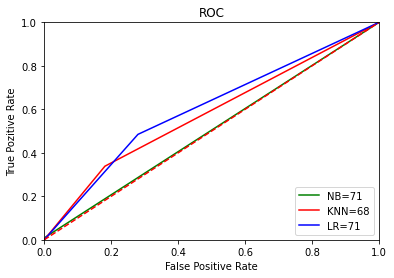

In [26]:
plt.title("ROC")

plt.plot(fpr_nb, tpr_nb, 'g', label="NB=71" % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, 'r', label="KNN=68" % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, 'b', label="LR=71" % roc_auc_nb)

plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Pozitive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Dataset sin variables centrales con alta correlación

Además de eliminar las variables icu y death_date, eliminamos otras features con alta correlación

In [27]:
f_data=old_data.drop(["death_date","icu","diabetes","copd","asthma","immunosuppression","hypertension","other_diseases","cardiovascular","obesity","chronic_kidney_failure","smoker"],axis=1)

In [28]:
f_data.corr().abs()

,sex,patient_type,intubated,pneumonia,age,pregnant,another_case,outcome
sex,1.000000,0.099855,0.099937,0.037784,0.034178,0.994610,0.020295,0.098489
patient_type,0.099855,1.000000,0.999405,0.245798,0.264302,0.099376,0.173116,0.196971
intubated,0.099937,0.999405,1.000000,0.246076,0.264637,0.099463,0.173110,0.197248
pneumonia,0.037784,0.245798,0.246076,1.000000,0.094538,0.037710,0.029940,0.074729
age,0.034178,0.264302,0.264637,0.094538,1.000000,0.033551,0.035751,0.174795
pregnant,0.994610,0.099376,0.099463,0.037710,0.033551,1.000000,0.019156,0.100146
another_case,0.020295,0.173116,0.173110,0.029940,0.035751,0.019156,1.000000,0.048737
outcome,0.098489,0.196971,0.197248,0.074729,0.174795,0.100146,0.048737,1.000000


In [29]:
f_data.shape

(83175, 8)

<AxesSubplot:>

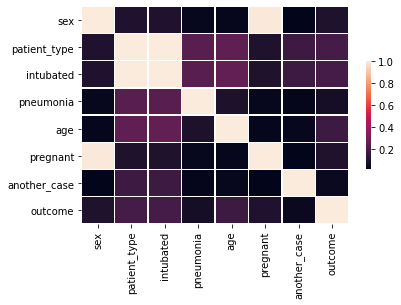

In [30]:
sns.heatmap(f_data.corr().abs(),annot=False,linewidths=.5, cbar_kws={"shrink": .5})

## Creo X e Y

In [31]:
xf=f_data.drop(["outcome"],axis=1)
yf=f_data["outcome"]
yf=pd.DataFrame(yf)
yf

,outcome
0,1
1,1
2,1
3,1
4,0
...,...
95779,1
95797,0
95798,0
95800,0


In [32]:
xf_train,xf_test,yf_train,yf_test=train_test_split(xf,yf,test_size=0.2,random_state=1)
print ("xf_train:" , xf_train.shape[0])
print ("yf_train:" , yf_train.shape[0])
print ("xf_test:" , xf_test.shape[0])
print ("xf_train:" , yf_test.shape[0])

xf_train: 66540
yf_train: 66540
xf_test: 16635
xf_train: 16635


In [33]:
yf_train=yf_train.astype('float')
yf_test=yf_test.astype('float')

## Pruebo algoritmos

In [34]:
#Navie Bayes
nb.fit(xf_train, yf_train)
score_nbf=nb.score(xf_test,yf_test)

#KNN
knn.fit(xf_train,yf_train)
score_knnf=knn.score(xf_test,yf_test)

#LR
lr.fit(xf_train,yf_train)
score_lrf=knn.score(xf_test,yf_test)

print ("Naive Bayes Acc Score:",score_nbf)
print ("KNN Acc Score:",score_knnf)
print ("LR Acc Score:",score_lrf)


Naive Bayes Acc Score: 0.6916140667267808
KNN Acc Score: 0.682717162608957
LR Acc Score: 0.682717162608957


In [35]:
yf_pred_nb = nb.predict(xf_test)
yf_pred_knn = knn.predict(xf_test)
yf_pred_lr = lr.predict(xf_test)


## Matriz confusión

In [36]:
print ("CM NB:\n",confusion_matrix(yf_test, yf_pred_nb))
print ("CM KNN:\n",confusion_matrix(yf_test, yf_pred_knn))
print ("CM LR:\n",confusion_matrix(yf_test, yf_pred_lr))
       
#sns.heatmap(confusion_matrix(yf_pred11,yf_test), annot=True,lw=2,cbar=False)
#plt.ylabel("True Values")
#plt.xlabel("Preict Value")
#plt.title("Confusion_matrix")

CM NB:
 [[9672 2267]
 [2863 1833]]
CM KNN:
 [[9908 2031]
 [3247 1449]]
CM LR:
 [[11287   652]
 [ 4039   657]]


## Scores

In [37]:
print("CLASS REPORT NB:\n",classification_report(yf_test,yf_pred_nb))
print("CLASS REPORT KNN:\n",classification_report(yf_test,yf_pred_knn))
print("CLASS REPORT LR:\n",classification_report(yf_test,yf_pred_lr))


CLASS REPORT NB:
               precision    recall  f1-score   support

         0.0       0.77      0.81      0.79     11939
         1.0       0.45      0.39      0.42      4696

    accuracy                           0.69     16635
   macro avg       0.61      0.60      0.60     16635
weighted avg       0.68      0.69      0.68     16635

CLASS REPORT KNN:
               precision    recall  f1-score   support

         0.0       0.75      0.83      0.79     11939
         1.0       0.42      0.31      0.35      4696

    accuracy                           0.68     16635
   macro avg       0.58      0.57      0.57     16635
weighted avg       0.66      0.68      0.67     16635

CLASS REPORT LR:
               precision    recall  f1-score   support

         0.0       0.74      0.95      0.83     11939
         1.0       0.50      0.14      0.22      4696

    accuracy                           0.72     16635
   macro avg       0.62      0.54      0.52     16635
weighted avg       

In [38]:
print ("F1 Score NB:", f1_score(yf_test,yf_pred_nb))
print ("F1 Score KNN:", f1_score(yf_test,yf_pred_knn))
print ("F1 Score LR:", f1_score(yf_test,yf_pred_lr))


F1 Score NB: 0.41678035470668484
F1 Score KNN: 0.3544520547945206
F1 Score LR: 0.21881765195670275


## Roc y Auc

In [39]:
#NB
probs_nbf=nb.predict_proba(xf_test)
preds_nbf=probs_nbf[:,1]
fpr_nbf,tpr_nbf, threshold_nbf =metrics.roc_curve(yf_test, yf_pred_nb)
roc_auc_nbf=metrics.auc(fpr_nbf,tpr_nbf)

#KNN
probs_knnf=knn.predict_proba(xf_test)
preds_knnf=probs_knnf[:,1]
fpr_knnf,tpr_knnf, threshold_knnf =metrics.roc_curve(yf_test, yf_pred_knn)
roc_auc_knnf=metrics.auc(fpr_knnf,tpr_knnf)

#LR
probs_lrf=lr.predict_proba(xf_test)
preds_lrf=probs_lrf[:,1]
fpr_lrf,tpr_lrf, threshold_lrf =metrics.roc_curve(yf_test, yf_pred_lr)
roc_auc_lrf=metrics.auc(fpr_lrf,tpr_lrf)


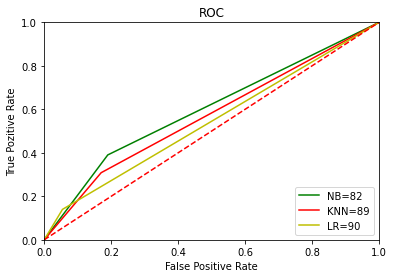

In [40]:
plt.title("ROC")

plt.plot(fpr_nbf, tpr_nbf, 'g', label="NB=82" % roc_auc_nbf)
plt.plot(fpr_knnf, tpr_knnf, 'r', label="KNN=89" % roc_auc_nbf)
plt.plot(fpr_lrf, tpr_lrf, 'y', label="LR=90" % roc_auc_nbf)

plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Pozitive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Dataset con dummies

In [41]:
d_data=old_data

In [42]:
d_data.head()

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,9999-99-99
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,9999-99-99
2,2,2,2,2,51,97,1,2,2,2,1,2,2,1,2,2,99,1,2,9999-99-99
3,2,2,2,2,57,97,1,2,2,2,2,2,2,2,2,2,99,1,2,2020-04-01
4,1,2,2,2,44,2,1,2,2,2,2,2,2,2,2,2,2,0,2,9999-99-99


In [43]:
d_data.assign(agegroup=pd.cut(d_data['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], right=False, labels=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"]))

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,...,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date,agegroup
0,2,1,97,2,42,97,2,2,1,2,...,2,2,2,2,2,99,1,97,9999-99-99,40-49
1,1,1,97,2,51,2,2,2,2,2,...,2,2,2,2,2,99,1,97,9999-99-99,50-59
2,2,2,2,2,51,97,1,2,2,2,...,2,2,1,2,2,99,1,2,9999-99-99,50-59
3,2,2,2,2,57,97,1,2,2,2,...,2,2,2,2,2,99,1,2,2020-04-01,50-59
4,1,2,2,2,44,2,1,2,2,2,...,2,2,2,2,2,2,0,2,9999-99-99,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95779,2,2,1,1,62,97,2,2,2,2,...,2,2,1,2,2,1,1,1,9999-99-99,60-69
95797,2,1,97,2,38,97,2,2,2,2,...,2,2,2,2,1,99,0,97,9999-99-99,30-39
95798,1,1,97,2,28,2,2,2,2,2,...,2,2,2,2,2,99,0,97,9999-99-99,20-29
95800,2,1,97,2,47,97,2,2,2,2,...,2,2,2,2,2,99,0,97,9999-99-99,40-49


In [44]:
d_data.drop(["icu","death_date","age"],axis=1)

,sex,patient_type,intubated,pneumonia,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome
0,2,1,97,2,97,2,2,1,2,2,2,2,2,2,2,99,1
1,1,1,97,2,2,2,2,2,2,2,2,2,2,2,2,99,1
2,2,2,2,2,97,1,2,2,2,1,2,2,1,2,2,99,1
3,2,2,2,2,97,1,2,2,2,2,2,2,2,2,2,99,1
4,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95779,2,2,1,1,97,2,2,2,2,2,2,2,1,2,2,1,1
95797,2,1,97,2,97,2,2,2,2,2,2,2,2,2,1,99,0
95798,1,1,97,2,2,2,2,2,2,2,2,2,2,2,2,99,0
95800,2,1,97,2,97,2,2,2,2,2,2,2,2,2,2,99,0


In [45]:
xd=d_data.drop(["outcome"],axis=1)
yd=d_data["outcome"]
yd=pd.DataFrame(y)
yd

,outcome
0,1
1,1
2,1
3,1
4,0
...,...
95779,1
95797,0
95798,0
95800,0


In [46]:
xd = pd.get_dummies(data=x, columns= x.columns,drop_first = True)

In [47]:
xd

,sex_2,patient_type_2,intubated_2,intubated_97,intubated_99,pneumonia_2,pneumonia_99,age_1,age_2,age_3,...,cardiovascular_2,cardiovascular_98,obesity_2,obesity_98,chronic_kidney_failure_2,chronic_kidney_failure_98,smoker_2,smoker_98,another_case_2,another_case_99
0,1,0,0,1,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
1,0,0,0,1,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
2,1,1,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
3,1,1,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
4,0,1,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95779,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
95797,1,0,0,1,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
95798,0,0,0,1,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
95800,1,0,0,1,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1


In [48]:
xd_train,xd_test,yd_train,yd_test=train_test_split(xd,yd,test_size=0.2,random_state=1)
print ("X_train:" , xd_train.shape[0])
print ("y_train:" , yd_train.shape[0])
print ("X_test:" , xd_test.shape[0])
print ("y_test:" , yd_test.shape[0])

X_train: 66540
y_train: 66540
X_test: 16635
y_test: 16635


In [49]:
yd_train=pd.DataFrame(yd_train)
yd_train

,outcome
13703,1
18856,0
58296,0
50713,0
57694,0
...,...
21510,0
77179,0
50953,1
5193,0


In [50]:
yd_train=yd_train.astype('float')
yd_test=yd_test.astype('float')

## Machine Learning Algorithms

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [52]:
#Navie Bayes
nb=GaussianNB()
nb.fit(xd_train, yd_train)
score_nbd=nb.score(xd_test,yd_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xd_train,yd_train)
score_knnd=knn.score(xd_test,yd_test)

#Logistic regression
scaler = StandardScaler()
xd_trainstd = scaler.fit_transform(xd_train)
xd_teststd = scaler.transform(xd_test)
lr = LogisticRegression()
lr.fit(xd_trainstd, yd_train)
score_lrd= lr.score(xd_teststd, yd_test)

#Score
print ("Navie Bayes Acc Score:",score_nbd)
print ("KNN Acc Score:",score_knnd)
print("Logistic Regression Score:", score_lrd)

Navie Bayes Acc Score: 0.5684400360685302
KNN Acc Score: 0.6840396753832282
Logistic Regression Score: 0.7389840697324918


In [53]:
yd_pred_nb = nb.predict(xd_test)
yd_pred_knn = knn.predict(xd_test)
yd_pred_lr = lr.predict(xd_test)

## Confusion_matrix

In [54]:
print("CM NB:\n", confusion_matrix(yd_test, yd_pred_nb))
print("CM KNN:\n", confusion_matrix(yd_test, yd_pred_knn))
print("CM LR:\n", confusion_matrix(yd_test, yd_pred_lr))

CM NB:
 [[6150 5789]
 [1390 3306]]
CM KNN:
 [[9838 2101]
 [3155 1541]]
CM LR:
 [[11523   416]
 [ 4026   670]]


## Recall,Precision and F-1 Score


* Recall    =  TP / (TP + FN)
* Precision = TP / (TP + FP) 
* F-Measure = (2 * Precision * Recall) / (Precision + Recall)

In [55]:
print("NB:\n", classification_report(yd_test,yd_pred_nb))
print("KNN:\n", classification_report(yd_test,yd_pred_knn))
print("LR:\n", classification_report(yd_test,yd_pred_lr))

NB:
               precision    recall  f1-score   support

         0.0       0.82      0.52      0.63     11939
         1.0       0.36      0.70      0.48      4696

    accuracy                           0.57     16635
   macro avg       0.59      0.61      0.56     16635
weighted avg       0.69      0.57      0.59     16635

KNN:
               precision    recall  f1-score   support

         0.0       0.76      0.82      0.79     11939
         1.0       0.42      0.33      0.37      4696

    accuracy                           0.68     16635
   macro avg       0.59      0.58      0.58     16635
weighted avg       0.66      0.68      0.67     16635

LR:
               precision    recall  f1-score   support

         0.0       0.74      0.97      0.84     11939
         1.0       0.62      0.14      0.23      4696

    accuracy                           0.73     16635
   macro avg       0.68      0.55      0.54     16635
weighted avg       0.71      0.73      0.67     16635



In [56]:
print ("F1 Score NB:", f1_score(yd_test,yd_pred_nb))
print ("F1 Score KNN:", f1_score(yd_test,yd_pred_knn))
print ("F1 Score LR:", f1_score(yd_test,yd_pred_lr))

F1 Score NB: 0.4794431150750489
F1 Score KNN: 0.36963300551691053
F1 Score LR: 0.23175371843652712


## roc & auc

In [57]:
#NB
probs_nbd=nb.predict_proba(xd_test)
preds_nbd=probs_nbd[:,1]
fpr_nbd,tpr_nbd, threshold_nbd =metrics.roc_curve(yd_test, yd_pred_nb)
roc_auc_nbd=metrics.auc(fpr_nbd,tpr_nbd)

#KNN
probs_knnd=knn.predict_proba(xd_test)
preds_knnd=probs_knnd[:,1]
fpr_knnd,tpr_knnd, threshold_knnd =metrics.roc_curve(yd_test, yd_pred_knn)
roc_auc_knnd=metrics.auc(fpr_knnd,tpr_knnd)

#LR
probs_lrd=lr.predict_proba(xd_test)
preds_lrd=probs_lrd[:,1]
fpr_lrd,tpr_lrd, threshold_lrd =metrics.roc_curve(yd_test, yd_pred_lr)
roc_auc_lrd=metrics.auc(fpr_lrd,tpr_lrd)

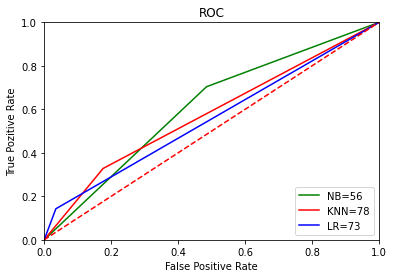

In [59]:
plt.title("ROC")

plt.plot(fpr_nbd, tpr_nbd, 'g', label="NB=56" % roc_auc_nbd)
plt.plot(fpr_knnd, tpr_knnd, 'r', label="KNN=78" % roc_auc_nbd)
plt.plot(fpr_lrd, tpr_lrd, 'b', label="LR=73" % roc_auc_nbd)

plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Pozitive Rate')
plt.xlabel('False Positive Rate')
plt.show()